# **Exploratory Data Analysis**

Data loading and Identify the dataframe structure

In [26]:
#import neccessary libraries
import pandas as pd
import numpy as np

In [27]:
#Load the dataset
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
#Check no.of rows and colunms
df.shape

(21613, 21)

In [29]:
#Check the columns
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
#Check the data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [31]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Find columns with negative values
negative_values = df[numerical_cols].lt(0).any()

negative_cols = negative_values[negative_values].index.tolist()
print("Columns containing negative values:", negative_cols)

Columns containing negative values: ['long']


In [32]:
# Check for missing values
print(df.isnull().sum())


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [33]:
#Check duplicated rows
print("No of duplicated rows: ", df.duplicated().sum())

No of duplicated rows:  0


In [34]:
#inspect unique value
print(df[['view', 'condition', 'grade']].nunique())


view          5
condition     5
grade        12
dtype: int64


In [35]:
#inspect unique count
print(df[['view', 'condition', 'grade']].value_counts())

view  condition  grade
0     3          7        5019
                 8        3900
      4          7        2673
      3          9        1752
      4          8        1183
                          ... 
3     4          5           1
                 12          1
                 13          1
4     1          5           1
      5          12          1
Name: count, Length: 146, dtype: int64


In [36]:
# Convert Date Features to Datetime
df['date'] = pd.to_datetime(df['date'])
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y')

#Create a new binary feature renovated_flag (0 = Never Renovated, 1 = Renovated)
df['renovated_flag'] = (df['yr_renovated'] > 0).astype(int)
df['yr_renovated'] = df['yr_renovated'].replace(0, np.nan)

# Convert Categorical Features
df['zipcode'] = df['zipcode'].astype('category')

# Convert 'id' to categorical
df['id'] = df['id'].astype('category')

# Convert Binary Features
df['waterfront'] = df['waterfront'].astype('category')

# Convert 'view', 'condition', 'grade' to ordinal
ordinal_features = ['view', 'condition', 'grade'] 
df[ordinal_features] = df[ordinal_features].astype(int)

#verify the types
print(df.dtypes)

id                      category
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront              category
view                       int32
condition                  int32
grade                      int32
sqft_above                 int64
sqft_basement              int64
yr_built          datetime64[ns]
yr_renovated             float64
zipcode                 category
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
renovated_flag             int32
dtype: object


In [37]:
#import pandas as pd

# Convert 'date' to datetime format
#df['date'] = pd.to_datetime(df['date'])

# Convert 'id' to categorical
#df['id'] = df['id'].astype('category')

# Convert 'zipcode' to categorical
#df['zipcode'] = df['zipcode'].astype(str)

# Convert 'waterfront' to binary (already 0 or 1, but ensuring it's integer type)
#df['waterfront'] = df['waterfront'].astype(int)

# Convert 'view', 'condition', 'grade' to ordinal
#ordinal_features = ['view', 'condition', 'grade']
#df[ordinal_features] = df[ordinal_features].astype(int)

# Convert 'yr_built' to datetime format
#df['yr_built'] = pd.to_datetime(df['yr_built'])

# Convert 'yr_renovated ' to datetime format
#df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])

# Verify the changes
#print(df.dtypes)


In [38]:
# Drop ID Column
df.drop(columns=["id"], inplace=True)
print("Dropping ID column")

Dropping ID column


Descriptive statistics and visualization

In [39]:
#Get Summary statistics of dataset
print(df.describe())

                                date         price      bedrooms  \
count                          21613  2.161300e+04  21613.000000   
mean   2014-10-29 04:38:01.959931648  5.400881e+05      3.370842   
min              2014-05-02 00:00:00  7.500000e+04      0.000000   
25%              2014-07-22 00:00:00  3.219500e+05      3.000000   
50%              2014-10-16 00:00:00  4.500000e+05      3.000000   
75%              2015-02-17 00:00:00  6.450000e+05      4.000000   
max              2015-05-27 00:00:00  7.700000e+06     33.000000   
std                              NaN  3.671272e+05      0.930062   

          bathrooms   sqft_living      sqft_lot        floors          view  \
count  21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
mean       2.114757   2079.899736  1.510697e+04      1.494309      0.234303   
min        0.000000    290.000000  5.200000e+02      1.000000      0.000000   
25%        1.750000   1427.000000  5.040000e+03      1.000000      0.00

In [40]:
print(df['price'].describe())

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


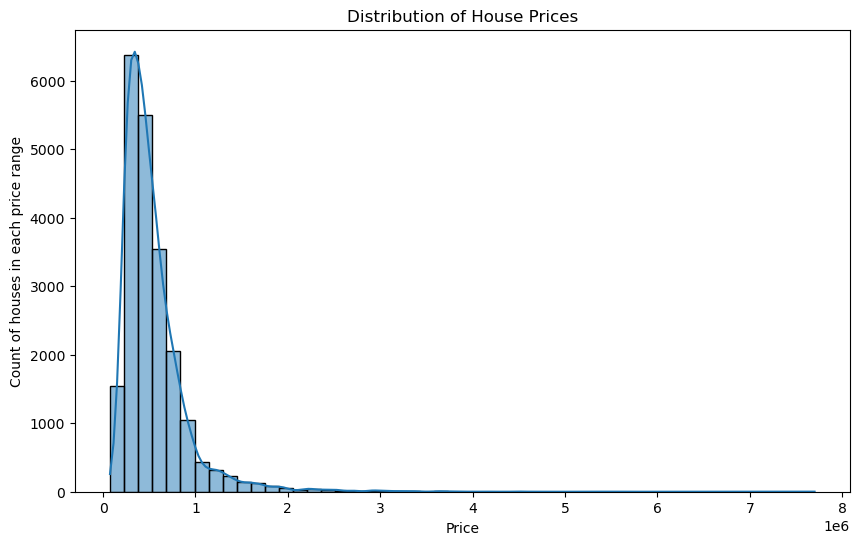

In [41]:
# Distribution of price range
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count of houses in each price range")
plt.show()

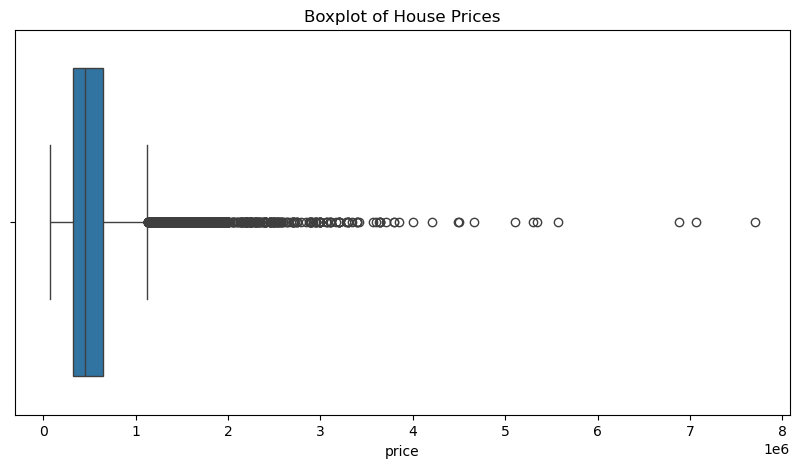

In [42]:
# Boxplot for Outliers detection
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title("Boxplot of House Prices")
plt.show()

In [43]:
# Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Computing the Interquartile Range (IQR)
IQR = Q3 - Q1

# Defining outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print("Number of Outliers:", outliers.shape[0])

Number of Outliers: 1146


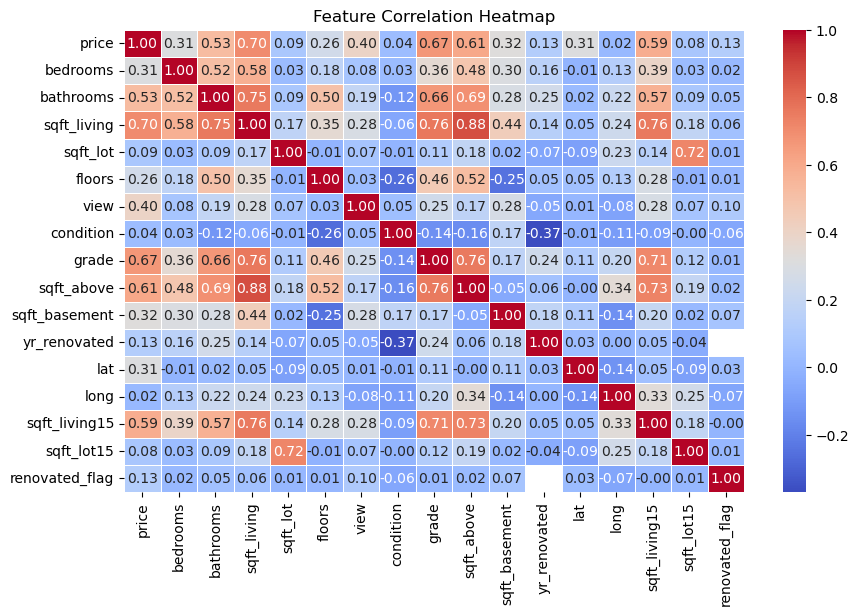

In [44]:
# Heatmap for Feature Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

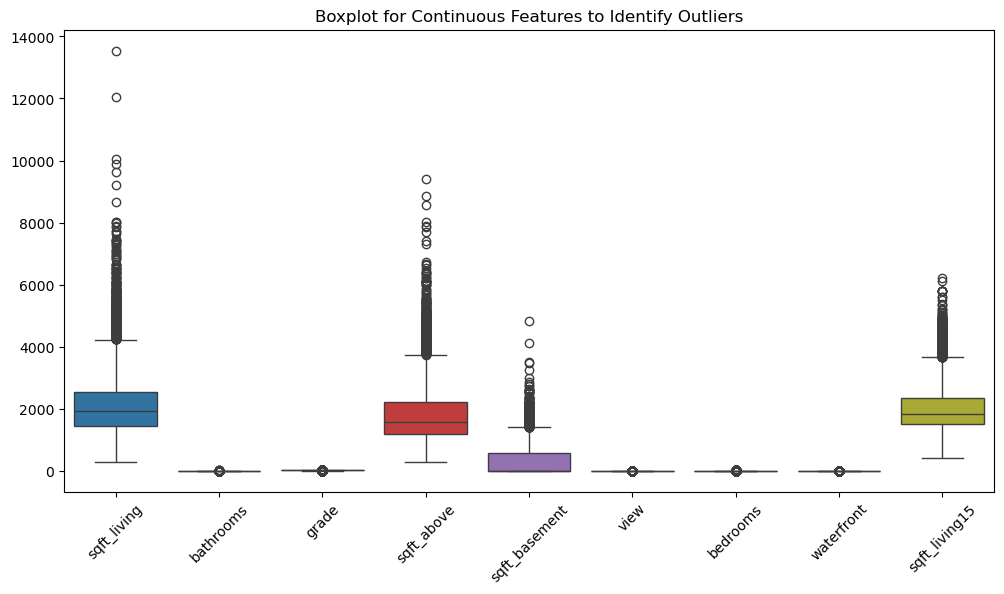

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for continuous features to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['sqft_living', 'bathrooms', 'grade', 'sqft_above', 
    'sqft_basement', 'view', 'bedrooms', 'waterfront', 'sqft_living15']])
plt.title('Boxplot for Continuous Features to Identify Outliers')
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9092\1424844154.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['waterfront'], y=df['price'], estimator=np.mean, ci=None, palette="Blues")
C:\Users\User\AppData\Local\Temp\ipykernel_9092\1424844154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['waterfront'], y=df['price'], estimator=np.mean, ci=None, palette="Blues")


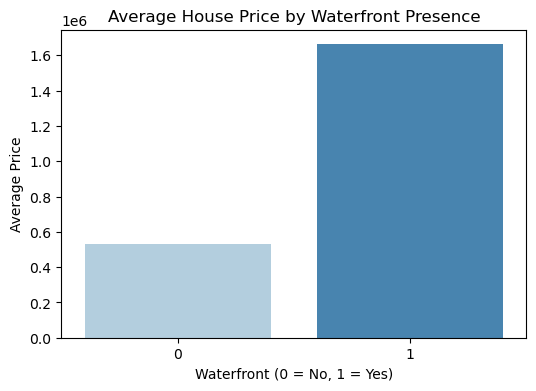

In [45]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['waterfront'], y=df['price'], estimator=np.mean, ci=None, palette="Blues")
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Average Price")
plt.title("Average House Price by Waterfront Presence")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_9092\1610153173.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['zipcode'], y=df['price'], estimator=np.mean, ci=None, palette="coolwarm")
C:\Users\User\AppData\Local\Temp\ipykernel_9092\1610153173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['zipcode'], y=df['price'], estimator=np.mean, ci=None, palette="coolwarm")


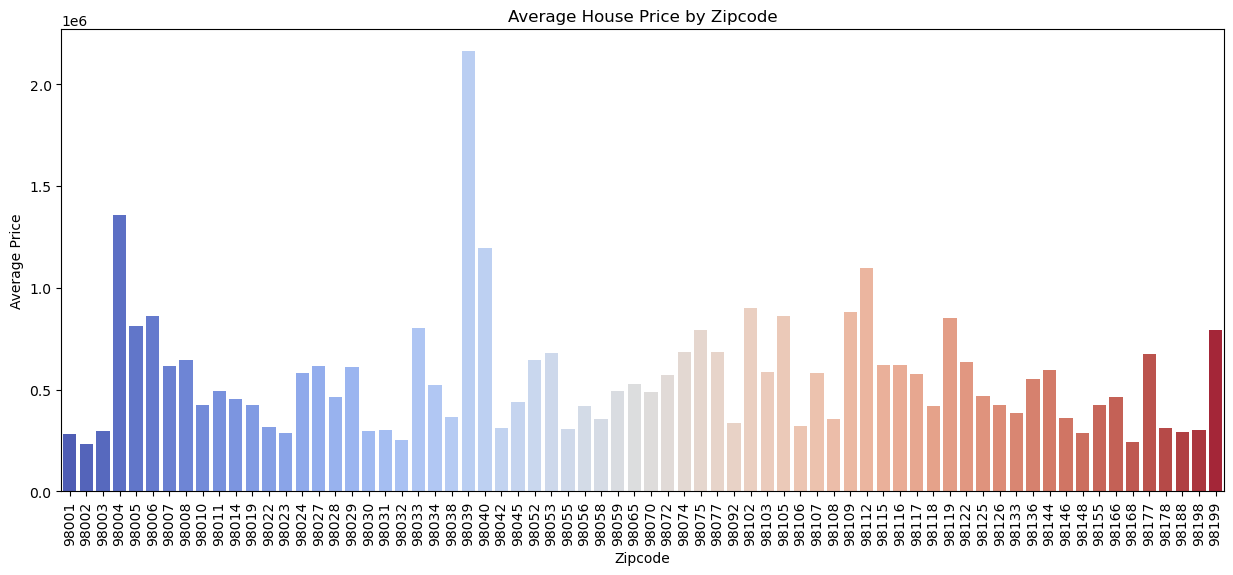

In [46]:
#Bar plot for zip code vs average price
plt.figure(figsize=(15, 6))
sns.barplot(x=df['zipcode'], y=df['price'], estimator=np.mean, ci=None, palette="coolwarm")
plt.xlabel("Zipcode")
plt.ylabel("Average Price")
plt.title("Average House Price by Zipcode")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


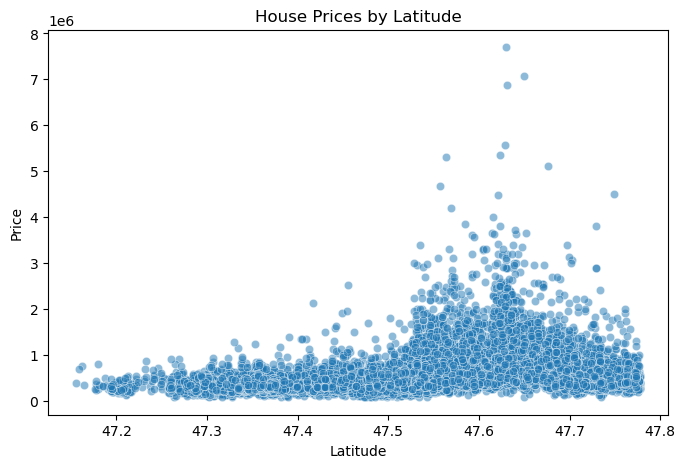

In [47]:
# Scatter plot of latitude vs. price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['lat'], y=df['price'], alpha=0.5)
plt.title('House Prices by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.show()

In [83]:
# Select relevant features
features = ['sqft_above' ,'sqft_living']

# Compute correlation matrix
correlation_matrix = df[features].corr()

# Display correlation matrix
print(correlation_matrix)

             sqft_above  sqft_living
sqft_above     1.000000     0.876597
sqft_living    0.876597     1.000000


# Random Forest regression and classification model Building

Preparations for model building

In [56]:
#importing necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report

In [87]:
# Features for Modeling
selected_features = [
    'sqft_living', 'bathrooms', 'grade', 'sqft_above', 'sqft_basement','view', 'bedrooms', 'waterfront', 'sqft_living15'
]

# Defining Target Variables
target_regression = 'price'
target_classification = 'price_category'

# Convert categorical features into int since we are using sklearn library
df['waterfront'] = df['waterfront'].astype(int)

# Define Price Categories for Classification since the models requires discrete labels
df['price_category'] = pd.qcut(df['price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


In [88]:
# Feature Scaling
scaler_regression = MinMaxScaler()
scaler_classification = StandardScaler()

df_reg = df[selected_features].copy()  # Copy for regression
df_class = df[selected_features].copy()  # Copy for classification

df_reg[selected_features] = scaler_regression.fit_transform(df_reg[selected_features])
df_class[selected_features] = scaler_classification.fit_transform(df_class[selected_features])


In [89]:
# Split Data into Train and Test Sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    df_reg, df[target_regression], test_size=0.2, random_state=42
)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    df_class, df[target_classification], test_size=0.2, random_state=42
)


Building Random Forest Regression Model

In [91]:
# Train the Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Predict on Test Data
y_pred_reg = rf_reg.predict(X_test_reg)

# Evaluate Model Performance by gettign mae,rmse,r2 values
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Random Forest Regression Results:")
print(f'MAE: {mae:.2f}')
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Random Forest Regression Results:
MAE: 149707.92
RMSE: 243486.96
R² Score: 0.61


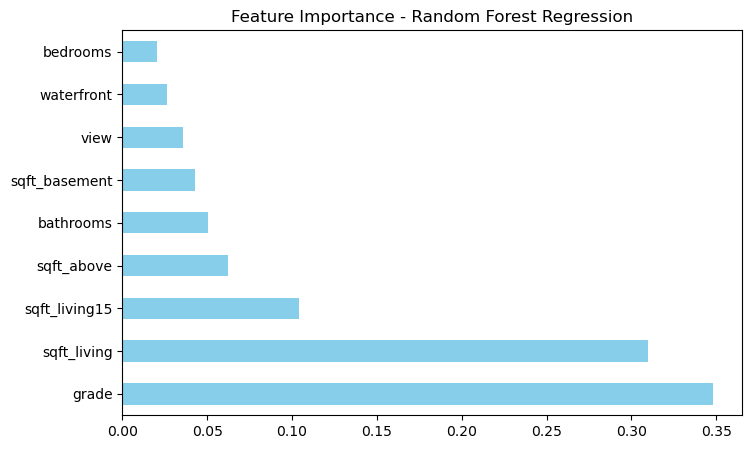

In [90]:
# Get the feature Importance Plot
plt.figure(figsize=(8, 5))
feat_importances = pd.Series(rf_reg.feature_importances_, index=selected_features)
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Feature Importance - Random Forest Regression")
plt.show()


Building Random Forest Classification Model

In [92]:
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train_class, y_train_class)

y_pred_class = rf_class.predict(X_test_class)

accuracy = accuracy_score(y_test_class, y_pred_class)
report = classification_report(y_test_class, y_pred_class)

print(f"Random Forest Classification Results:")
print(f" Accuracy: {accuracy:.2f}")
print(" Classification Report:\n", report)



Random Forest Classification Results:
 Accuracy: 0.50
 Classification Report:
               precision    recall  f1-score   support

        High       0.39      0.38      0.39      1067
         Low       0.54      0.57      0.55      1065
      Medium       0.37      0.35      0.36      1071
   Very High       0.68      0.69      0.69      1120

    accuracy                           0.50      4323
   macro avg       0.49      0.50      0.50      4323
weighted avg       0.50      0.50      0.50      4323



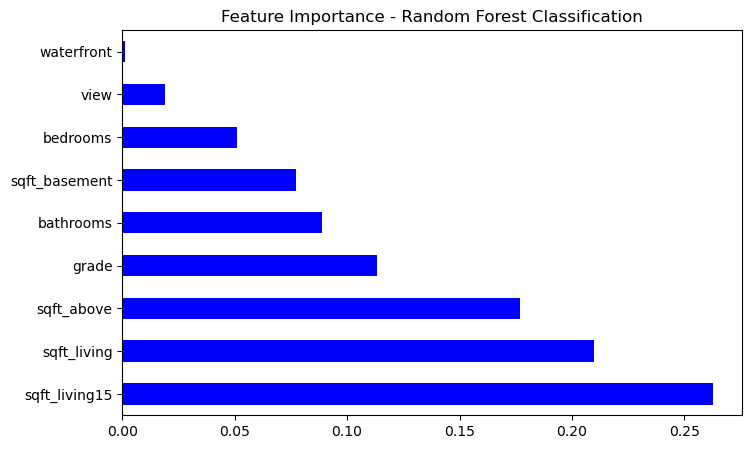

In [94]:
# Get the feature Importance Plot
plt.figure(figsize=(8, 5))
feat_importances = pd.Series(rf_class.feature_importances_, index=selected_features)
feat_importances.nlargest(10).plot(kind='barh', color='blue')
plt.title("Feature Importance - Random Forest Classification")
plt.show()